In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import pickle

from keras.applications.vgg16 import  VGG16
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()


In [2]:
# with open('./Data GMB/GMB1.pkl', 'rb') as f:
#     model = pickle.load(f)

In [31]:
# existing_classes = data.classes_
# print(existing_classes)

In [4]:
# Open the text file in read mode
file_path = r"D:\90 image dataset\name of the animals.txt"
with open(file_path, 'r') as file:
    # Read the contents of the file line by line
    file_contents = file.readlines()

# Remove the newline character ('\n') from each line and append to the array
classes = [line.strip() for line in file_contents]


# Print the array
print(classes[40:50])

['hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito']


In [41]:

SIZE = 256  # Resized Image
train_images = []
train_labels = []
 
test_images = []
test_labels = []

# Define the 10 classes you want to read
selected_classes = classes[10:20]

# Read images from the selected classes
for class_name in selected_classes:
    class_folder = os.path.join(r"D:\90 image dataset\animals", class_name)
    for img_path in glob.glob(os.path.join(class_folder, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, (SIZE, SIZE)) 
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            train_images.append(img)
            train_labels.append(class_name)  # Assign a label to the image

# Convert lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

train_images

test_size = 0.2  # 20% for testing

train_images, test_images, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=test_size, random_state=42)

In [51]:
# Encode labels from text to integers.
le = preprocessing.LabelEncoder()


le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)


le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)


test_labels_encoded
train_labels_encoded
print(test_labels_encoded)
print(train_labels_encoded)

[1 6 9 1 3 4 0 7 1 5 0 1 1 9 6 3 0 3 3 1 0 9 8 9 6 8 1 2 9 7 9 2 1 4 3 7 2
 8 7 4 6 0 8 9 0 3 7 1 1 8 4 4 1 9 9 5 3 2 2 3 1 2 5 8 9 1 9 9 1 5 5 0 7 6
 7 8 5 3 9 7 4 7 9 6 1 0 2 3 6 3 3 9 1 5 4 4 3 0 6 1 1 3 8 5 1 7 2 4 4 6 3
 7 9 9 6 6 5 2 8 7]
[2 0 6 8 3 2 9 4 9 7 1 9 2 2 7 3 1 1 4 1 0 3 2 1 8 1 6 6 0 0 9 8 5 5 8 4 0
 7 1 1 6 3 0 6 5 2 4 4 9 6 4 4 8 6 2 0 8 0 1 4 1 4 9 7 7 6 6 7 6 4 8 8 1 3
 6 4 7 5 8 2 2 7 7 3 3 4 4 4 4 7 9 9 9 1 3 2 5 0 8 0 2 7 0 5 5 7 5 5 0 5 0
 7 3 8 9 0 6 4 6 4 9 6 6 2 2 5 8 7 2 0 1 0 2 9 1 0 5 3 0 4 4 5 9 3 5 8 4 1
 3 5 5 5 0 0 6 9 7 0 0 9 8 0 8 7 6 7 5 3 0 7 4 0 3 0 2 3 9 2 8 5 3 8 9 8 1
 5 2 6 2 3 2 8 5 8 5 1 6 1 7 9 1 6 6 8 3 5 5 5 6 0 6 0 2 4 5 9 0 1 6 5 4 8
 4 2 4 8 8 0 7 5 3 5 2 7 8 2 7 5 5 8 2 8 1 2 3 7 1 5 4 4 7 2 3 3 5 4 8 7 7
 8 8 6 2 9 3 5 0 3 2 9 6 7 9 6 9 6 6 9 4 8 8 6 1 2 7 7 7 6 5 2 9 3 5 9 2 5
 2 6 3 9 4 3 1 2 8 6 6 3 9 7 5 2 9 4 9 0 1 9 7 2 8 0 2 1 4 1 4 3 5 2 0 0 0
 2 2 3 7 8 3 9 1 0 4 8 5 8 2 7 8 0 9 8 3 6 4 5 6 4 3 0 4 9 8 7 1 3 7 9 9 3
 5 2 

In [52]:
# Split data into test and train datasets (already split but assigning to meaning)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [44]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0


#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

4/4 [==============================] - 36s 9s/step
Accuracy =  0.8
1/1 [==============================] - 1s 521ms/step
The prediction for this image is:  ['caterpillar']
The actual label for this image is:  caterpillar


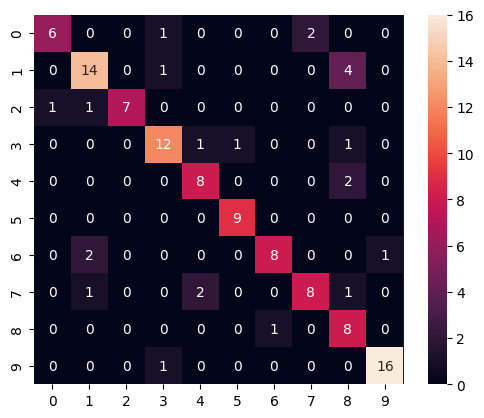

In [53]:

# Train the model on training data with xgboosting
model.fit(features, y_train) #For sklearn no one hot encoding


#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction = model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction)
#print(cm)
sns.heatmap(cm, annot=True)

#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

1/1 [==============================] - 1s 640ms/step
7
The prediction for this image is: ['deer']
The actual label for this image is: deer


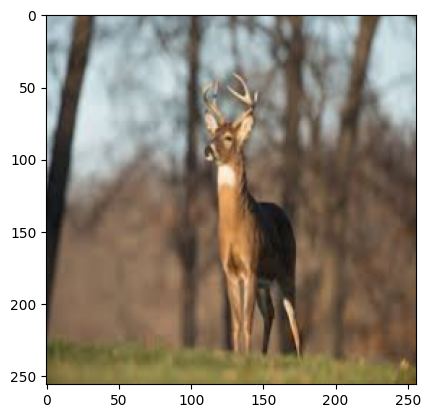

In [55]:

n = np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)  # Expand dims so the input is (num images, x, y, c)
input_img_feature = VGG_model.predict(input_img)
input_img_features = input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img_features)[0]
print(prediction)
prediction = le.inverse_transform([prediction])  # Reverse the label encoder to original name
print("The prediction for this image is:", prediction)
print("The actual label for this image is:", test_labels[n])



In [69]:
model.classes_ 


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
import pickle

# Save the trained model to a file
model_filename = './Data GMB/updated_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)